# Machine Learning Pipeline - Model Training and Evaluation

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Training and Evaluation

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# recampling
from imblearn.under_sampling import RandomUnderSampler

# models
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score

# to disable warnings
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

c:\Users\Cisow\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# load the train and test set with the engineered variables
X_train_scaled = pd.read_csv('xtrain_scaled.csv')
X_test_scaled = pd.read_csv('xtest_scaled.csv')
X_train_scaled.head()

,order_amount,downpayment_amount,principal_amount,num_instalments_initial,test_ab_version,pm_bincode,pm_card_bank,pm_card_country_code,pm_card_level,pm_card_type,postcode,region_cp,province_cp,locality_cp,pm_is_prepaid,pm_has_bank,pm_is_national,ba_postcode,cust_phone_country,cust_phone_prefix,checkout_user_agent_browser_family,checkout_user_agent_browser_version,checkout_user_agent_device_family,checkout_user_agent_device_brand,checkout_user_agent_device_model,checkout_user_agent_os_family,checkout_user_agent_os_version,checkout_user_agent_is_pc,checkout_user_agent_is_mobile,checkout_user_agent_is_tablet,checkout_user_agent_is_touch_capable,n_ips,n_distinct_ips,total_price,device_screen,device_browser_version,device_browser_language,device_browser_type,device_cookies_enabled,real_ip_parent_organization,real_ip_city,real_ip_region,real_ip_isp,providerZ_score,ip_userType,ip_reputation,log_providerA_score,ip_address.traits.user_type,providerY_score,payment_method_card_type,bank_countrycode,creditcard_level,creditcard_type,birthday_year,n_item,pm_bincode_na,cust_phone_prefix_na,checkout_user_agent_is_pc_na,checkout_user_agent_is_mobile_na,checkout_user_agent_is_tablet_na,checkout_user_agent_is_touch_capable_na,device_cookies_enabled_na,providerZ_score_na,ip_reputation_na,log_providerA_score_na,providerY_score_na
0,0.931634,0.825557,0.927385,0.379310,0.0,0.549267,0.466667,0.5,0.111111,1.0,0.0,0.928571,0.740741,0.285714,0.0,1.0,1.0,1.0,1.0,0.0,0.636364,0.785714,0.4,0.000000,0.4,0.5,0.75,0.0,1.0,0.0,1.0,0.102041,0.0,0.898705,0.80,0.666667,0.500,0.142857,1.0,0.55,0.625,0.714286,0.888889,0.000000,0.666667,1.0,0.000000,0.0,0.4,0.666667,0.5,0.285714,1.0,0.708333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.699385,0.574441,0.699721,0.551724,0.0,0.631802,0.866667,0.5,0.111111,1.0,0.0,0.857143,0.296296,0.285714,0.0,1.0,1.0,0.0,1.0,0.0,0.181818,0.928571,0.6,0.571429,0.6,0.0,0.75,1.0,0.0,0.0,0.0,0.040816,0.0,0.546072,0.25,0.962963,0.500,0.857143,1.0,0.55,0.625,0.047619,0.444444,0.110772,0.666667,1.0,0.000000,0.0,0.6,0.666667,0.5,0.285714,1.0,0.902778,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.833097,0.659888,0.834303,0.965517,0.0,0.549273,0.466667,0.5,0.111111,1.0,0.0,0.857143,0.481481,0.285714,0.0,1.0,1.0,0.0,1.0,0.0,0.636364,0.214286,0.4,0.428571,0.4,0.5,0.75,0.0,1.0,0.0,1.0,0.081633,0.0,0.751263,0.80,0.629630,0.375,0.142857,1.0,0.55,0.625,0.380952,0.333333,0.496951,1.000000,1.0,0.652363,0.5,0.6,0.666667,0.5,0.285714,1.0,0.472222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.713044,0.550666,0.715117,0.965517,0.0,0.822985,0.733333,0.5,0.888889,1.0,0.0,0.857143,0.851852,0.285714,1.0,1.0,1.0,0.0,1.0,0.0,0.636364,0.214286,0.4,0.714286,0.4,0.5,0.75,0.0,1.0,0.0,1.0,0.040816,0.0,0.562842,0.80,0.629630,0.500,0.142857,1.0,0.30,0.625,0.142857,0.333333,0.000000,0.666667,1.0,0.000000,0.0,0.4,1.000000,0.5,0.571429,1.0,0.513889,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.973092,0.871215,0.967814,0.344828,0.0,0.613849,0.800000,0.0,0.000000,0.0,0.0,0.428571,0.259259,0.285714,0.0,1.0,0.0,0.0,1.0,0.0,0.636364,0.142857,0.4,0.428571,0.4,0.5,0.75,0.0,1.0,0.0,1.0,0.183673,0.0,0.960739,0.15,0.962963,0.125,0.142857,1.0,0.55,0.625,0.666667,0.666667,0.218496,0.666667,1.0,0.630310,0.0,0.4,0.333333,0.0,0.142857,0.0,0.847222,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# load the target
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')
y_train.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [4]:
# load the pre-selected features
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 
# display final feature set
features

['num_instalments_initial',
 'test_ab_version',
 'pm_card_bank',
 'province_cp',
 'pm_is_prepaid',
 'pm_has_bank',
 'checkout_user_agent_browser_family',
 'checkout_user_agent_browser_version',
 'checkout_user_agent_device_brand',
 'checkout_user_agent_device_model',
 'checkout_user_agent_os_version',
 'device_screen',
 'device_browser_version',
 'real_ip_parent_organization',
 'real_ip_city',
 'real_ip_region',
 'real_ip_isp',
 'providerZ_score',
 'log_providerA_score',
 'ip_address.traits.user_type',
 'providerY_score',
 'payment_method_card_type',
 'creditcard_level',
 'creditcard_type']

In [5]:
# reduce the train and test set to the selected features
X_train_reduced = X_train_scaled[features]
X_test_reduced = X_train_scaled[features]

### Random undersampling for lasso feature selected train set

In [7]:
rus = RandomUnderSampler(random_state=1)
# Perform undersampling on the training data for reduced train set
X_train_reduced_resampled, y_train_reduced_resampled = rus.fit_resample(X_train_reduced, y_train)

### Random undersampling for all feature space

In [8]:
# Perform undersampling on the training data for reduced train set
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

### Random Forest baseline model for reduced feature space

In [9]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
# Get cross-validated predictions using StratifiedKFold
y_pred = cross_val_predict(rf, X_train_reduced_resampled, y_train_reduced_resampled)

In [10]:
print("\nClassification Report:\n", classification_report(y_train_reduced_resampled, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.80      0.74      1058
         1.0       0.76      0.64      0.70      1058

    accuracy                           0.72      2116
   macro avg       0.73      0.72      0.72      2116
weighted avg       0.73      0.72      0.72      2116



### Random Forest baseline model for all feature space

In [11]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
# Get cross-validated predictions using StratifiedKFold
y_pred = cross_val_predict(rf, X_train_resampled, y_train_resampled)

In [12]:
print("\nClassification Report:\n", classification_report(y_train_resampled, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.82      0.75      1058
         1.0       0.78      0.65      0.71      1058

    accuracy                           0.73      2116
   macro avg       0.74      0.73      0.73      2116
weighted avg       0.74      0.73      0.73      2116



**Observations**
* F1-scores for baseline model is .74 and .7 for reduced feature space and resampled data
* As expected Random Forest performs slightly better than linear model feature selection, therefore we will not sure lasso for feature selection. We will experiment with regularization and feature selection using XGB though.

### Hyperparameter tuning with randomized cross validation

In [13]:
# Because of total feature space is so large, I used a randomized search to narrow down the parameters for the model. I took the best model from this and did a more granular search.
# random forest with random search
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Define the parameter grid
param_grid = {'n_estimators': [100, 500, 1000],
              'bootstrap': [True, False],
              'max_depth': [3, 5, 10, 20, 50, 75, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4, 10],
              'min_samples_split': [2, 5, 10]}

# Use RandomizedSearchCV with F1 score as the selection metric
clf_rf_rnd = RandomizedSearchCV(rf,
                                param_distributions=param_grid,
                                n_iter=100,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

In [15]:
# Fit the model on the resampled data
best_clf_rf = clf_rf_rnd.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", best_clf_rf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [16]:
# Use the best estimator to predict on the training set
y_pred = best_clf_rf.best_estimator_.predict(X_test_scaled)
# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.82      0.89      5774
         1.0       0.14      0.74      0.23       226

    accuracy                           0.81      6000
   macro avg       0.56      0.78      0.56      6000
weighted avg       0.96      0.81      0.87      6000


Confusion Matrix:
 [[4712 1062]
 [  59  167]]


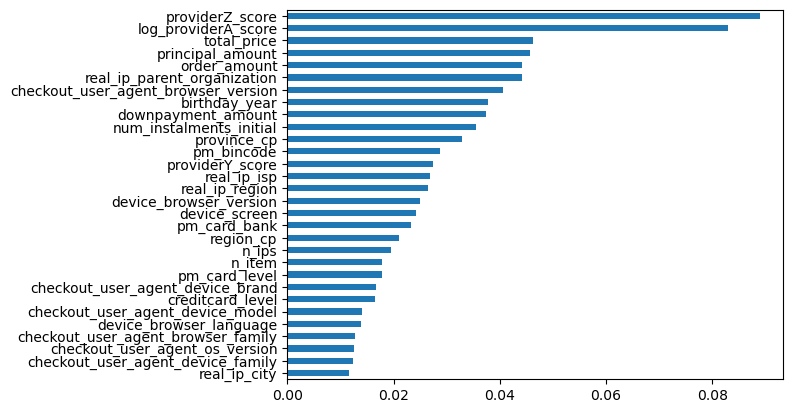

In [20]:
# feature importances
best_rf = best_clf_rf.best_estimator_.fit(X_train_resampled
                                         ,y_train_resampled)
feat_importances = pd.Series(best_rf.feature_importances_
                            ,index = X_train_resampled.columns)
feat_importances.nlargest(30).sort_values().plot(kind = 'barh')
plt.show()

In [21]:
# XGBoost with random search
xgb = XGBClassifier(random_state = 1)
param_grid = {'n_estimators': [20,50,100,250,500,1000]
             ,'colsample_bytree': [0.2,0.5,0.7,0.8,1]
             ,'max_depth': [2,5,10,15,20,25,None]
             ,'reg_alpha': [0,0.5,1]
             ,'reg_lambda': [1,1.5,2]
             ,'subsample': [0.5,0.6,0.7,0.8,0.9]
             ,'learning_rate': [0.01,0.1,0.2,0.3,0.5,0.7,0.9]
             ,'gamma': [0,0.01,0.1,1,10,100]
             ,'min_child_weight': [0,0.01,0.1,1,10,100]
             ,'sampling_method':['uniform','gradient_based']}
clf_xgb_rnd = RandomizedSearchCV(xgb
                                ,param_distributions = param_grid
                                ,n_iter = 1000
                                ,cv = 5
                                ,verbose = True
                                ,n_jobs = -1
                                ,scoring='f1')

# Fit the model on the resampled data
best_clf_xgb = clf_xgb_rnd.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", best_clf_xgb.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best parameters found:  {'subsample': 0.6, 'sampling_method': 'uniform', 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 0.1, 'max_depth': 15, 'learning_rate': 0.5, 'gamma': 0, 'colsample_bytree': 0.5}


In [22]:
# Use the best estimator to predict on the training set
y_pred = best_clf_xgb.best_estimator_.predict(X_test_scaled)
# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.75      0.85      5774
         1.0       0.10      0.74      0.18       226

    accuracy                           0.75      6000
   macro avg       0.54      0.74      0.51      6000
weighted avg       0.95      0.75      0.82      6000


Confusion Matrix:
 [[4304 1470]
 [  58  168]]


### Model Evaluation Summary

The final XGBoost model, with hyperparameter tuning, produced the following performance results on the validation dataset:
Classification Report:

* Class 0 (Non-fraudulent transactions):
    * Precision: 0.99
    * Recall: 0.75
    * F1-score: 0.85
    * Support: 5,774 transactions
* Class 1 (Fraudulent transactions):
    * Precision: 0.10
    * Recall: 0.74
    * F1-score: 0.18
    * Support: 226 transactions
* Overall accuracy: 0.75
* Macro average:
    * Precision: 0.54
    * Recall: 0.74
    * F1-score: 0.51
* Weighted average:
    * Precision: 0.95
    * Recall: 0.75
    * F1-score: 0.82

### Analysis:
* Class Imbalance: There is a significant class imbalance between fraudulent (Class 1) and non-fraudulent (Class 0) transactions, which impacts performance metrics. Class 1 (fraudulent transactions) is heavily underrepresented in the dataset, leading to high precision for Class 0 but much lower precision for Class 1.

* Recall for Class 1: The model's recall for fraudulent transactions (Class 1) is relatively strong at 0.74, indicating that it correctly identifies 74% of fraud cases. This is a positive outcome, as correctly detecting fraud is critical in many applications.

* Precision for Class 1: However, the model struggles with precision for fraudulent transactions, with a score of 0.10, which means that many of the predicted fraud cases are false positives. This could lead to unnecessary investigations for legitimate transactions.

* F1-Score for Class 1: The F1-score for fraudulent transactions is 0.18, which reflects the model's difficulty in balancing precision and recall for fraud detection.

* Overall Performance: While the model shows strong performance in predicting non-fraudulent transactions, the imbalance in the dataset leads to a lower F1-score for fraud detection. The macro average F1-score of 0.51 indicates room for improvement, especially in handling the minority fraud class.